# Задачи к Лекции 3

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


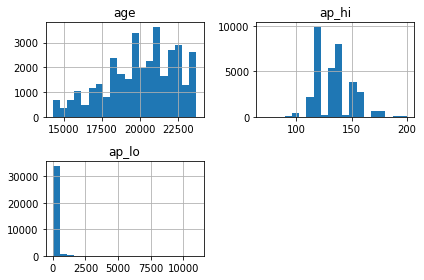

In [22]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

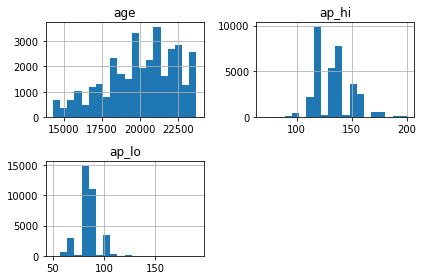

In [23]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

In [27]:
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

In [24]:
# Your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "weight", "height","ap_hi","ap_lo"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

68703 0.7088482307905041


In [25]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1]), array([[0.10737541, 0.89262459]]))

In [26]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

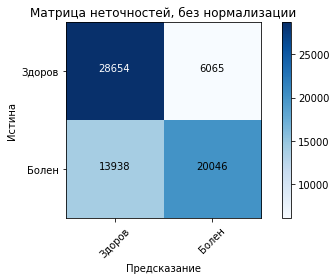

In [28]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

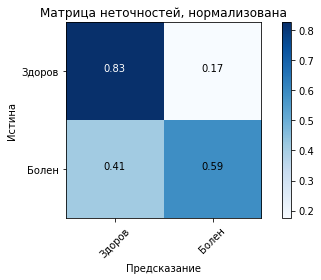

In [29]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

В примере из лекций не учитывались такие параметры, как давление систолическое и диастолическое. вероятность поставить диагноз болезни при здоровье человека был 0.38, это гипердиагностика (при этом поставить диагноз болезни при болезни человека был 0.62). Сейчас же из матрицы неточностей видно, что модель обучена на недодиагностику (0.17 вероятности гипердиагностики и 0.59 недодиагностики).
при этом accuracy  выше у последней модели.  


**2. (не обязательно) Придумать как построить наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить с предыдущими значениями.**

68703 0.589828682881388


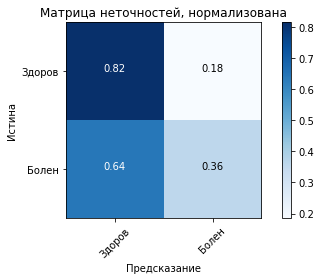

In [54]:
# Your code here #gaussian

gnb2 = GaussianNB()

train_k = data[["cholesterol", "gluc"]]
target_k= data["cardio"]

model2 = gnb.fit(train_k, target_k)
predict2 = model2.predict(train_k)
print(data.shape[0],
     (target_k == predict2).sum() / data.shape[0])




cnf_matrix_2g = confusion_matrix(target_k, predict2)

plt.figure()
plot_confusion_matrix(cnf_matrix_2g, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()


плохо работает

68703 0.5655357116865348


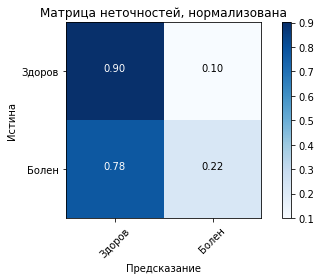

In [55]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()


model2m = mnb2.fit(train_k, target_k)
predict2m = model2m.predict(train_k)
print(data.shape[0],
     (target_k == predict2m).sum() / data.shape[0])




cnf_matrix_2m = confusion_matrix(target_k, predict2m)

plt.figure()
plot_confusion_matrix(cnf_matrix_2m, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

вообще не работает

68703 0.5053491113925156


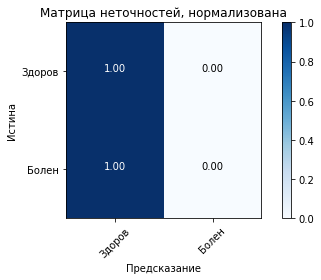

In [59]:
from sklearn.naive_bayes import BernoulliNB
bnb2 = BernoulliNB()

train_k = data[["cholesterol", "gluc"]]
target_k= data["cardio"]

model2b = bnb2.fit(train_k,target_k)
predict2b = model2b.predict(train_k)
print(data.shape[0],
     (target_k == predict2b).sum() / data.shape[0])




cnf_matrix_2b = confusion_matrix(target_k, predict2b)

plt.figure()
plot_confusion_matrix(cnf_matrix_2b, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

 Вообще не работает. надо использовать перекодировку значений
 

In [79]:
mydata=data[["cholesterol", "gluc","cardio"]]
mydata.head()
n=[]
ch=mydata[['cholesterol']].values.tolist()

g=mydata[['gluc']].values.tolist()

def make_conjt(l,p,d):
    for i in range(len(ch)):
      l[i]=+'+'+d[i]

make_conjt(n,ch,g)
n
    #не успеваю сделать перекодировку. пусть будет ответ гауссиан

TypeError: bad operand type for unary +: 'str'

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

In [52]:
#пакет Бернулли для бинарных признаков
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

train_b = data[["gender","smoke","alco","active"]]
target_b = data["cardio"]

model_b = bnb.fit(train_b, target_b)
predict_b = model_b.predict(train_b)
print(data.shape[0],
     (target_b == predict_b).sum() / data.shape[0])

68703 0.5176920949594632


In [49]:
cnf_matrix_b = confusion_matrix(target_b, predict_b)
cnf_matrix_b

array([[28527,  6192],
       [26944,  7040]])

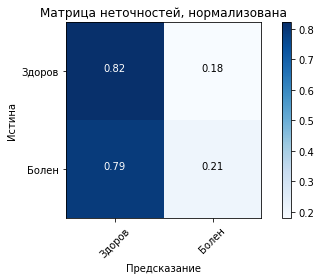

In [35]:
plt.figure()
plot_confusion_matrix(cnf_matrix_b, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

в этой матрице неточностей отличаются нижние столбцы по сравнению с примером из первого задания. Здесь недодиагностика гораздо выше. 

In [51]:

brnb = GaussianNB()


model_j = brnb.fit(train_b, target_b)
predict_j = model_j.predict(train_b)
print(data.shape[0],
     (target_b == predict_b).sum() / data.shape[0])
#в этом примере для точности нет разницы использовать пакет гауссов или пакет бернулли. 

68703 0.5176920949594632


**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать как их объеденить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

68703 0.7117884226307439


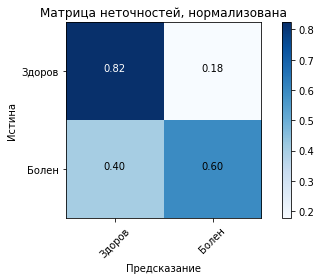

In [80]:
# A lot of code here
gnb4 = GaussianNB()

train_4 = data[["cholesterol", "gluc","age", "ap_hi", "ap_lo","gender","smoke","alco","active"]]
target_4= data["cardio"]

model4 = gnb.fit(train_4, target_4)
predict4 = model4.predict(train_4)
print(data.shape[0],
     (target_4 == predict4).sum() / data.shape[0])




cnf_matrix_4 = confusion_matrix(target_4, predict4)

plt.figure()
plot_confusion_matrix(cnf_matrix_4, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()




Эта модель работает за счет модели из первого задания. Я разберусь с перекодировкой категориальных данных . 

Простите пожалуйста за такое низкое качество решения в домашнем задании. Я исправлюсь. снова не будет на лекции, теперь уже по семейным обстоятельствам. это меня не оправдывает, я буду работать лучше. 